In [1]:
'''
@ author : haijun xiong
@ date   : 25/Sep/2020

'''
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def MSE_loss(y_hat, y):
    return 1/2 * (y_hat - y)**2
class LinearModel():
    def __init__(self, train_data, epoch, lr):
        x = np.concatenate((train_data[:, :-1], np.ones((train_data.shape[0], 1))), axis=1)
        y = train_data[:, -1]
        self.x = x
        self.y = y.reshape(-1,1)
        self.w = np.zeros((x.shape[1], 1))
        self.lr = lr
        self.epochs = epoch
    def train(self):
        for epoch in range(self.epochs):
            y_hat = self.x @ self.w
            loss = MSE_loss(y_hat, self.y)
            w_grad = 2 * self.x.T @ (y_hat - self.y)
            self.w -= self.lr * w_grad.reshape(-1,1)
            if epoch % 10 == 0:
                print('epoch:{}, loss:{}'.format(epoch, np.sum(loss)))
            if epoch % 100 == 0:
                self.lr *= 0.1
    def test(self, test_x):
        y_hat = test_x @ self.w
        return y_hat

    def evaluate(self, test_data):
        test_x = np.concatenate((test_data[:, :-1], np.ones((test_data.shape[0], 1))), axis=1)
        test_y = test_data[:, -1].reshape(-1,1)
        y_hat = self.test(test_x)
        y_hat[y_hat < 0] = - 1
        y_hat[y_hat > 0] = 1
        acc = np.sum(y_hat == test_y) / len(test_y)
        return acc

In [3]:
def get_cov(d):
    return np.identity(d)

def get_mean(d):
    mean = np.zeros(d)
    mean[0] = 1
    return mean

In [4]:
def get_dataset(mu, cov, nums):
    scale = 0.8
    data1 = np.random.multivariate_normal(mean=mean, cov=cov, size=nums)
    data2 = np.random.multivariate_normal(mean=-1*mu, cov=cov, size=nums)
    data1 = np.concatenate((data1, -1 * np.ones((nums, 1))), axis=1)
    data2 = np.concatenate((data2, np.ones((nums, 1))), axis=1)
    train_data1, val_data1 = split_dataset(data1, scale) 
    train_data2, val_data2 = split_dataset(data2, scale)
    train_data = np.vstack((train_data1, train_data2)).astype(np.float32)
    val_data = np.vstack((val_data1, val_data2)).astype(np.float32)
    return train_data, val_data

def split_dataset(dataset, scale):
    num_data = dataset.shape[0]
    train_dataset = []
    valid_dataset = []
    train_indice = random.sample(range(num_data), int(num_data * scale))
    for index in range(num_data):
        if index in train_indice:
            train_dataset.append(dataset[index])
        else:
            valid_dataset.append(dataset[index])
    return np.array(train_dataset), np.array(valid_dataset)

In [5]:
def show_clf(data, w, nums=500):
    x = data[:, :-1]
    y = data[:, -1]
    xx = np.linspace(-4, 5, nums)
    a = w[0]
    b = w[1]
    c = w[2]
    yy = -(a/b)*xx - (c/b)
    plt.figure()
    plt.scatter(x[:,0], x[:,1], c=y, alpha=0.2)
    plt.plot(xx, yy, c='r')
    plt.show()

In [6]:
np.random.seed(1)
epoch = 400
nums = 250
d = 2
mean = np.array([1, -1])
cov = get_cov(d)
train_data, test_data = get_dataset(mean, cov, nums)

In [7]:
model = LinearModel(train_data, epoch, lr=1e-3)

In [8]:
model.train()

epoch:0, loss:200.0
epoch:10, loss:42982729.582499474
epoch:20, loss:53575883603.637764
epoch:30, loss:66779844050370.83
epoch:40, loss:8.323796598877827e+16
epoch:50, loss:1.0375224860858004e+20
epoch:60, loss:1.2932234664152944e+23
epoch:70, loss:1.6119428316167453e+26
epoch:80, loss:2.0092116790944454e+29
epoch:90, loss:2.5043887985534555e+32
epoch:100, loss:3.12160401991432e+35
epoch:110, loss:4.261353602377793e+33
epoch:120, loss:1.6351212711583148e+31
epoch:130, loss:6.274113394163135e+28
epoch:140, loss:2.4074360463142617e+26
epoch:150, loss:9.237557488975385e+23
epoch:160, loss:3.5445372886547725e+21
epoch:170, loss:1.3600721408942148e+19
epoch:180, loss:5.21872413179948e+16
epoch:190, loss:200247330600634.7
epoch:200, loss:768367754332.4053
epoch:210, loss:283014346715.98663
epoch:220, loss:173099701770.74057
epoch:230, loss:105872748515.4013
epoch:240, loss:64754813355.37837
epoch:250, loss:39605903432.265434
epoch:260, loss:24224107924.79624
epoch:270, loss:14816160075.09027

[[-1316.24952437]
 [ 1246.38155281]
 [  -31.26889764]]


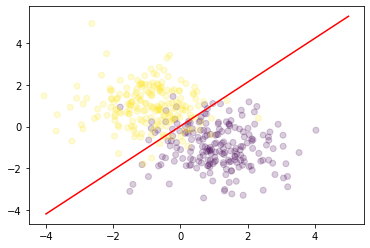

In [9]:
print(model.w)
show_clf(train_data, model.w, 2 * nums)     # plot the figure

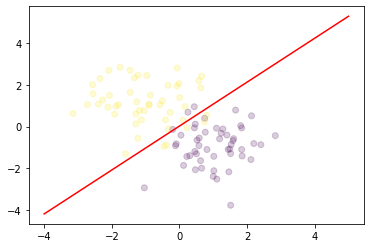

In [10]:
show_clf(test_data, model.w, 2 * nums) 

In [11]:
acc = model.evaluate(test_data)
acc

0.92

In [12]:
d = 500
mean = get_mean(d)
cov = get_cov(d)
train_data, test_data = get_dataset(mean, cov, nums)
model = LinearModel(train_data, epoch * 5)
model.train()

epoch:0, loss:200.0
epoch:10, loss:1269445225411.42
epoch:20, loss:3.3625517905799715e+20
epoch:30, loss:9.512837687693011e+28
epoch:40, loss:2.705111204140171e+37
epoch:50, loss:7.70059629763357e+45
epoch:60, loss:2.193017199901026e+54
epoch:70, loss:6.246575493908445e+62
epoch:80, loss:1.779432995599292e+71
epoch:90, loss:5.06921446954243e+79
epoch:100, loss:1.444139635107685e+88
epoch:110, loss:2.8763955634289817e+85
epoch:120, loss:3.300626842396602e+81
epoch:130, loss:3.7874372165854654e+77
epoch:140, loss:4.3460634038388097e+73
epoch:150, loss:4.987108435517449e+69
epoch:160, loss:5.722745349064852e+65
epoch:170, loss:6.566953411230313e+61
epoch:180, loss:7.546248312079358e+57
epoch:190, loss:9.39067626701948e+54
epoch:200, loss:7.081494438349618e+54
epoch:210, loss:6.849671124331007e+54
epoch:220, loss:6.732619889596823e+54
epoch:230, loss:6.618564791497492e+54
epoch:240, loss:6.507403010958742e+54
epoch:250, loss:6.399037383841605e+54
epoch:260, loss:6.293375384614458e+54
epoch

In [13]:
y_hat = model.evaluate(test_data)
y_hat

0.56